In [1]:
import numpy as np
data = np.loadtxt("pima-indians-diabetes.data.csv", delimiter = ",")

In [2]:
X = data[:, :-1]
y = data[:, -1]

In [3]:
from neuroboa.nn import NN
from neuroboa.layers import Dense, Activation
from neuroboa.optims import Adam, SGD
from neuroboa.functions import ReLU, Sigmoid
from neuroboa.losses import BinaryCrossEntropy

In [4]:
from sklearn.model_selection import train_test_split

X_tr, X_t, y_tr, y_t = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [5]:
y_tr = y_tr.reshape((y_tr.shape[0], 1))
y_t = y_t.reshape((y_t.shape[0], 1))
y_tr.shape

(514, 1)

In [6]:
nn = NN([
    Dense(12, input_shape=(8, )),
    Activation(ReLU()),
    Dense(8),
    Activation(ReLU()),
    Dense(1),
    Activation(Sigmoid())
])

nn.fit(X_tr, y_tr, epochs = 2000, batch_size = 10, optimizer = Adam(), loss = BinaryCrossEntropy())

Plot: True


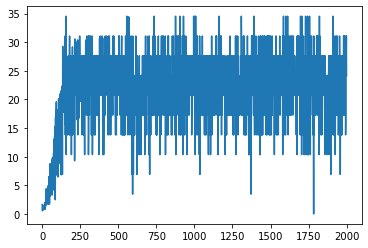

In [7]:
loss_list = nn.get_loss_list()

import matplotlib.pyplot as plt
plt.plot(range(len(loss_list)), loss_list)

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import binary_accuracy

model = Sequential([
    Dense(12, activation = "relu"),
    Dense(8, activation = "relu"),
    Dense(1, activation = "sigmoid")
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[binary_accuracy])
history = model.fit(X_tr, y_tr, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

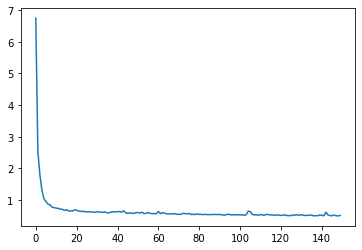

In [9]:
plt.plot(history.history["loss"])